# General testing

In [1]:
import torch
device = torch.device("cuda")
t = torch.tensor([1,2], device = device)
print(t)

tensor([1, 2], device='cuda:0')


In [74]:
my_list = ["a", "b"]
#type(my_list)
isinstance(my_list, type(my_list))

True

In [ ]:
import torch
t = torch.zeros(10, 10)
t[1:3, 5:7]=1 # rows, columns
print(len(t.shape))
t

In [ ]:
import numpy as np
a = np.zeros((10, 10))
a[1:3, 5:7]=1 # rows, columns
print(a.shape)
a

In [ ]:
import numpy as np
a = np.random.randn(5,25)
print(a.shape)
print(a.size)
c=np.random.randn(10)
print(c.shape)
b=a.reshape(125)
print(b.shape)

In [ ]:
from PIL import Image
import torch
import numpy as np
img = Image.open("../develop_util/images/0000172.jpg")

img_np=np.array(img)
img_vec=torch.LongTensor(img_np)
#print(img)
img_vec

In [ ]:
# testing flattening and stacking
import torch
A=[[1,2,3], [4,5,6], [7,8,9]] #three pixel img
B=[[10,11,12], [13,14,15], [16,17,18]] #another one
T1=torch.tensor(A)
T2=torch.tensor(B)
C=[T1, T2] # a batch
T3=torch.stack([torch.flatten(x) for x in C])
print("Before:")
print(C)
print("After:")
print(T3.shape)
print(T3)

print(T3.size()[0]*T3.size()[1])

In [2]:
import numpy as np

my_values = [1, 2, 3]

np.mean(my_values), np.std(my_values)


(2.0, 0.816496580927726)

In [5]:
input = 256
def halvering(input):
    divider=2
    while input/divider > 1:
        print(input/divider, input, divider)
        divider*=2
halvering(input)
        





128.0 256 2
64.0 256 4
32.0 256 8
16.0 256 16
8.0 256 32
4.0 256 64
2.0 256 128


# Learning to know path

In [ ]:
import numpy as np
import matplotlib.path as mplpath

In [ ]:
my_coordinates = [
    [[0,0], [0,3], [3, 3], [3,0]], 
    [[3,3], [3,8], [8, 8], [8,3]]
]
every_point = np.array([[[a,b] for b in list(range(10))] for a in list(range(10))])
every_point.shape = (100, 2)
to_update = np.zeros(100)
for polygon in my_coordinates:
    polygon_points = np.array(polygon)
    path = mplpath.Path(polygon_points)
    truthvals = path.contains_points(every_point)
    truthvals = np.asarray(truthvals, int)
    to_update+=truthvals
    #break
to_update.reshape(10,10)

In [ ]:
a = np.array([0, 0, 0, 0])
b = np.array([0, 1, 1, 0])
a+b

In [ ]:
polygon_points = np.array([[3,3], [3,8], [8, 8], [8,3]])

In [ ]:
polygon_points

In [ ]:
path = mplpath.Path(polygon_points)
#print(path)

In [ ]:
path.contains_point([5,5])

In [ ]:
path.contains_points([[5,5],[6,6],[0,0],[1,9]])

In [ ]:
grid = np.array([[[a,b] for b in list(range(10))] for a in list(range(10))])
#print(grid)

In [ ]:
grid.shape = (100,2)
#print(grid)

In [ ]:
truthvals = path.contains_points(grid)
print(truthvals)

In [ ]:
truthvals = np.asarray(truthvals, int)
print(truthvals)

In [ ]:
truthvals.shape = (10,10)
print(truthvals)

# Getting to know `pyplot`

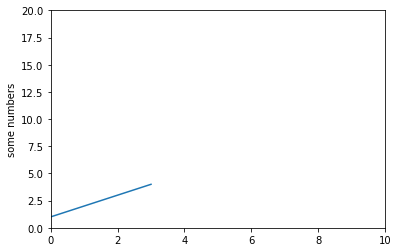

In [4]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.axis([0, 10, 0, 20])
plt.show()

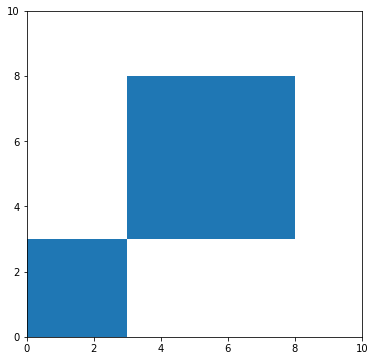

In [12]:
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

#N=4

plt.figure(figsize=(6,6))
ax = plt.gca()
plt.axis([0,10, 0,10])

#resolution = 50

patches = []

polygons = [
    [[0,0], [0,3], [3, 3], [3,0]], 
    [[3,3], [3,8], [8, 8], [8,3]]
    ]

for p in polygons:
    polygon = Polygon(p, True, fill = False)
    #ax.add_patch(polygon)
    patches.append(polygon)

#colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches)
#p.set_array(colors)
ax.add_collection(p)
#fig.colorbar(p, ax=ax)

plt.show()


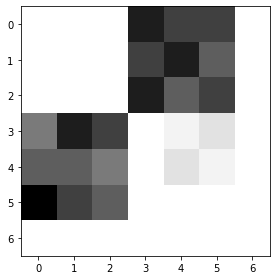

In [57]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

heat = np.array([[0.0, 0.0, 0.0, 0.9, 0.8, 0.8, 0.0],
                 [0.0, 0.0, 0.0, 0.8, 0.9, 0.7, 0.0],
                 [0.0, 0.0, 0.0, 0.9, 0.7, 0.8, 0.0],
                 [0.6, 0.9, 0.8, 0.0, 0.1, 0.2, 0.0],
                 [0.7, 0.7, 0.6, 0.0, 0.2, 0.1, 0.0],
                 [1.0, 0.8, 0.7, 0.0, 0.0, 0.0, 0.0],
                 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

fig, ax = plt.subplots()
im = ax.imshow(heat, cmap="Greys")
#ax.grid(color="w")
fig.tight_layout()
plt.show()

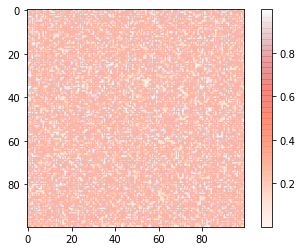

In [60]:
# from https://stackoverflow.com/questions/51601272/python-matplotlib-heatmap-colorbar-from-transparent

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# get colormap
ncolors = 256
color_array = plt.get_cmap('Reds')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(1.0,0.0,ncolors)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='red_alpha',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

# show some example data
f,ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100),cmap='red_alpha')
plt.colorbar(mappable=h)

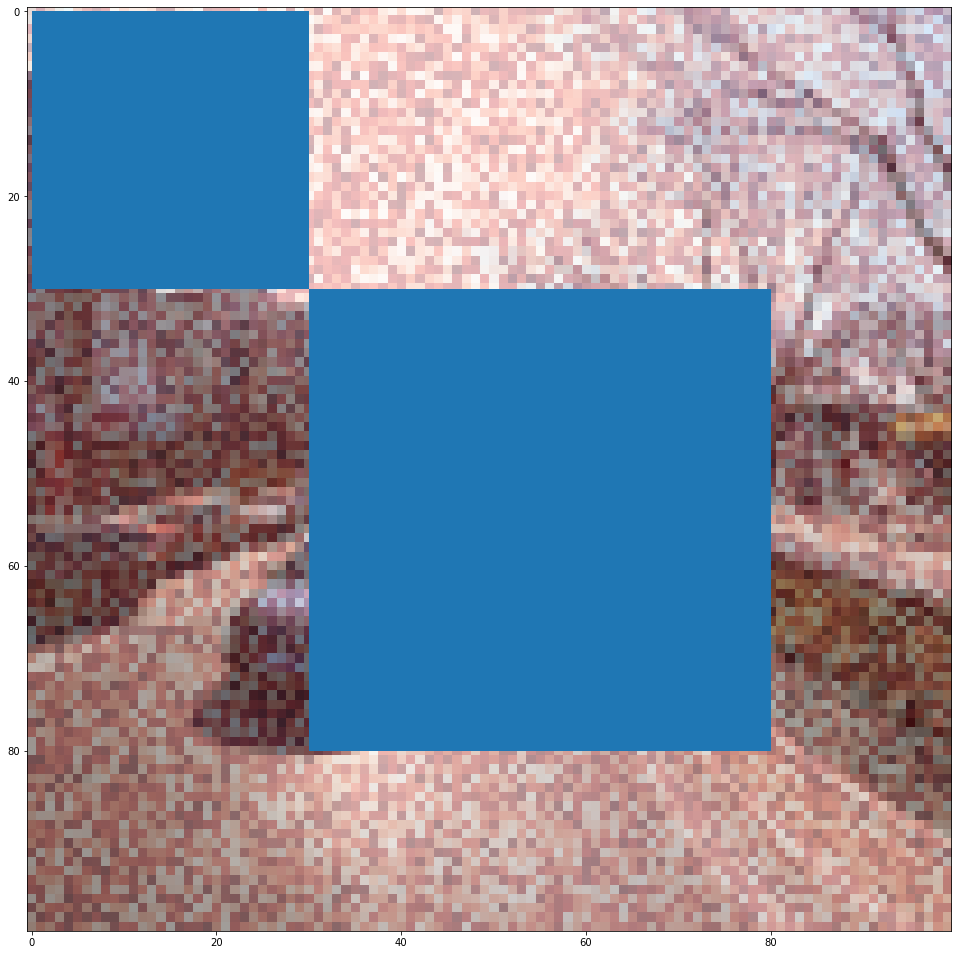

In [8]:
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
from PIL import Image

%matplotlib inline

#img = mpimg.imread("../develop_util/images/0000172.jpg")
img = Image.open("../develop_util/images/0000172.jpg")
img = img.resize((100, 100))




plt.figure(figsize=(17, 17))
ax = plt.gca()
plt.imshow(img, alpha=1.0)

#lt.axis([0,10, 0,10])

#resolution = 50

patches = []

polygons = [
    [[0,0], [0,30], [30, 30], [30,0]], 
    [[30,30], [30,80], [80, 80], [80,30]]
    ]

for p in polygons:
    #color = (0, 1, 0)
    #polygon = Polygon(p, True, fill = False, color=color) # fill problem!
    polygon = Polygon(p, True, fill = False)
    #ax.add_patch(polygon)
    patches.append(polygon)

#colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches)
#p.set_array(colors)
ax.add_collection(p)
#fig.colorbar(p, ax=ax)

heat = np.random.rand(100,100)

#fig, ax = plt.subplots()
im = ax.imshow(heat, cmap="Reds", alpha = 0.3)
#ax.grid(color="w")
#fig.tight_layout()


plt.show()


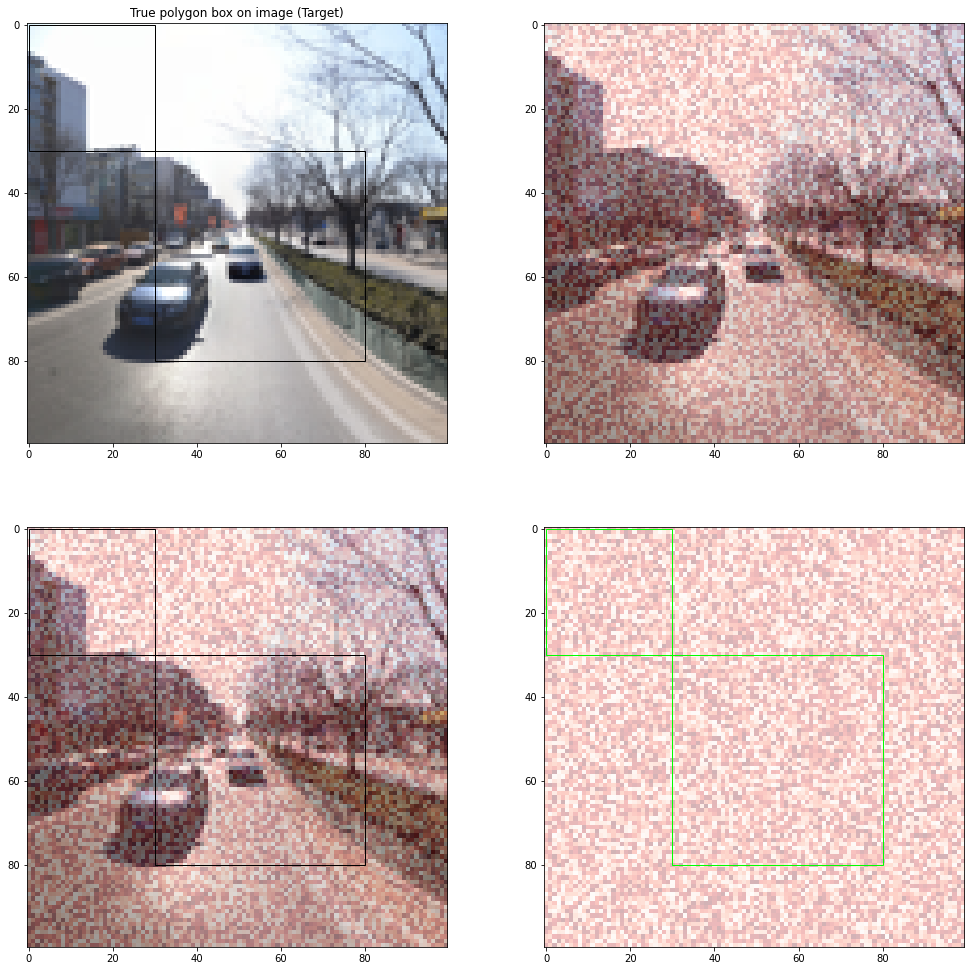

In [63]:
# 2x2 subplotting ... 

import numpy as np
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
from PIL import Image

# COLLECTING ELEMENTS
# ELEMENT 1: the image
#img = mpimg.imread("../develop_util/images/0000172.jpg")
img = Image.open("../develop_util/images/0000172.jpg")
img = img.resize((100, 100))

# ELEMENT 2: polygon patches
patches = []

polygons = [
    [[0,0], [0,30], [30, 30], [30,0]], 
    [[30,30], [30,80], [80, 80], [80,30]]
    ]

for p in polygons:
    #color = (0, 1, 0)
    #polygon = Polygon(p, True, fill = False, color=color) # fill problem!
    polygon = Polygon(p, True, fill = False)
    #ax.add_patch(polygon)
    patches.append(polygon)

#colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches)

# ELEMENT 3: heat map
heat = np.random.rand(100,100)

# SETTING UP FIGURE
%matplotlib inline

figure = plt.figure(figsize=(17, 17))

#Up-Lft
ax1 = figure.add_subplot(221)
ax1.set_title("True polygon box on image (Target)")
ax1.imshow(img)
for pg in polygons:
    polly = Polygon(pg, fill = False)
    ax1.add_patch(polly)
    
#ax1.add_collection(p)

# plt.subplot(221)
# plt.imshow(img)
#ax = plt.gca()
#ax.add_collection(p)

#Up-Rgt
ax2 = figure.add_subplot(222)
ax2.imshow(img)
ax2.imshow(heat, cmap="Reds", alpha = 0.3)

# plt.subplot(212)
# plt.imshow(img)
# plt.imshow(heat, cmap="Reds", alpha = 0.3)

#Dn-Lft
ax3 = figure.add_subplot(223)
ax3.imshow(img)
ax3.imshow(heat, cmap="Reds", alpha = 0.3)
for pg in polygons:
    polly = Polygon(pg, fill = False)
    ax3.add_patch(polly)

# plt.subplot(223)
# plt.imshow(img)
# plt.imshow(heat, cmap="Reds", alpha = 0.3)
# ax = plt.gca()
# ax.add_collection(p)

#Dn-Rgt
ax4 = figure.add_subplot(224)
ax4.imshow(heat, cmap="Reds", alpha = 0.3)
for pg in polygons:
    polly = Polygon(pg, fill = False, color = (0, 1, 0))
    ax4.add_patch(polly)


#ax4.add_collection(p)

# plt.subplot(224)
# plt.imshow(heat, cmap="Reds", alpha = 0.3)
#ax = plt.gca()
#ax.add_collection(p)

plt.show()
